## **PREDICTION OF SEPSIS DIAGNOSIS USING MACHINE LEARNING**

## **SEPSIS UNDERSTANDING AND OVERVIEW**
### **What is Sepsis?**
Sepsis occurs when your immune system has a dangerous reaction to an infection. It causes extensive inflammation throughout your body that can lead to tissue damage, organ failure and even death. Many different kinds of infections can trigger sepsis, which is a medical emergency. The quicker you receive treatment, the better your outcome will be.

Sepsis is a life-threatening medical emergency caused by your body’s overwhelming response to an infection. Without urgent treatment, it can lead to tissue damage, organ failure and death.

### **Who does sepsis affect?**
Sepsis can affect anyone, but people with any kind of infection, especially bacteremia, are at a particularly high risk.

Other people who are at a high risk include:

1. People older than 65 years old, newborns and infants, and pregnant people.
2. People with medical conditions such as diabetes, obesity, cancer and kidney disease.
3. People with weakened immune systems.
4. People who are in the hospital for other medical reasons.
5. People with severe injuries, such as large burns or wounds.
6. People with catheters, IVs or breathing tubes.


### **How is sepsis diagnosed?**
It’s very important to quickly identify people with infections that may go on to develop sepsis. There are no strict criteria to diagnose sepsis. That’s why providers use a combination of findings — from a physical exam, lab tests, X-rays and other tests — to identify the infection (blood cultures) and diagnose sepsis.

Providers may sometimes suspect sepsis at bedside using the set of sepsis criteria — a tool called quick sequential organ failure assessment (qSOFA). You may have sepsis if you have confirmed or probable infection and at least two of the following criteria:

1. Low blood pressure: Systolic blood pressure (the top number) reading of less than 100 mmHg (millimeters of mercury).
2. High respiratory rate: Respiratory rate faster than 22 breaths per minute.
3. Glasgow coma scale: A score of 15 or less on the Glasgow coma scale, which determines your level of consciousness.
Providers will request a number of additional tests to identify your infection and any organ damage or dysfunction. These tests may include:

4. Blood tests: Complete blood count (CBC), blood cultures, tests to check for abnormal liver and kidney function clotting problems and electrolyte abnormalities.
6. Blood oxygen level: A test to evaluate the level of oxygen in your blood.
Urine tests: Urinalysis and urine culture.
Imaging tests: X-rays or CT scans.

**REFERENCE:** https://my.clevelandclinic.org/health/diseases/12361-sepsis

**Data Fields**

| Column Name	| Attribute/Target	| Description |
|---------------|-------------------|-------------|
| ID	| N/A	| Unique number to represent patient ID |
| PRG	| Attribute 1	| Plasma glucose | 
| PL	| Attribute 2	| Blood Work Result-1 (mu U/ml) |
| PR	| Attribute 3	| Blood Pressure (mm Hg) |
| SK	| Attribute 4	| Blood Work Result-2 (mm) |
| TS	| Attribute 5	| Blood Work Result-3 (mu U/ml) |
| M11	| Attribute 6	| Body mass index (weight in kg/(height in m)^2) |
| BD2	| Attribute 7	| Blood Work Result-4 (mu U/ml) |
| Age	| Attribute 8	| patients age (years) |
| Insurance |	N/A	| If a patient holds a valid insurance card |
| Sepssis	| Target	| Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise |

**Business Objective**

The objective of this project is to predict whether a patient in ICU will develop sepsis or not based on the 8 attributes to allow for early detection.

**Analytical Questions**
1. What is the relationship between Plasma level and sepsis prevalence?
2. How is the BMI influencing Sepsis?
3. Are insured patients less or more likely to have sepsis.
4. Does Age contribute to the likelihood of having sepsis?
5. How do different blood work tests relate with sepsis
6. Which level of blood pressure is most likely to develop sepsis?

**Hypothesis**

`H0:` There is no relationship between the plasma and sepsis

`H1:` There is a relationship between the plasma and sepsis

### Importation

In [539]:
#import analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning library
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#models
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


import warnings
warnings.filterwarnings('ignore')

In [540]:
data = pd.read_csv('../data/Paitients_Files_Train.csv').drop(columns='ID')
data.sample(5) 

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
119,4,99,76,15,51,23.2,0.223,21,1,Negative
192,7,159,66,0,0,30.4,0.383,36,1,Positive
547,4,131,68,21,166,33.1,0.160,28,1,Negative
463,5,88,78,30,0,27.6,0.258,37,1,Negative
85,2,110,74,29,125,32.4,0.698,27,0,Negative


### Data Cleaning

In [541]:
data['sepsis'] = data['Sepssis']
data = data.drop(columns='Sepssis')
data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,sepsis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [542]:
#convert column headers to lowercase
data.columns = data.columns.str.lower()

#rename the feature columns to more descriptive names
data = data.rename({'prg':'plasma',
                    'pl':'bt1',
                    'pr':'pressure',
                    'sk':'bt2',
                    'ts':'bt3',
                    'm11':'bmi',
                    'bd2':'bt4'},axis=1)
data

,plasma,bt1,pressure,bt2,bt3,bmi,bt4,age,insurance,sepsis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [543]:
#map insurance to negative and positive
data['insurance'] = data['insurance'].map({0:'Negative',1:'Positive'})
data

,plasma,bt1,pressure,bt2,bt3,bmi,bt4,age,insurance,sepsis
0,6,148,72,35,0,33.6,0.627,50,Negative,Positive
1,1,85,66,29,0,26.6,0.351,31,Negative,Negative
2,8,183,64,0,0,23.3,0.672,32,Positive,Positive
3,1,89,66,23,94,28.1,0.167,21,Positive,Negative
4,0,137,40,35,168,43.1,2.288,33,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,Negative,Negative
595,0,188,82,14,185,32.0,0.682,22,Positive,Positive
596,0,67,76,0,0,45.3,0.194,46,Positive,Negative
597,1,89,24,19,25,27.8,0.559,21,Negative,Negative


### Exploratoratory Data Analysis

In [544]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   plasma     599 non-null    int64  
 1   bt1        599 non-null    int64  
 2   pressure   599 non-null    int64  
 3   bt2        599 non-null    int64  
 4   bt3        599 non-null    int64  
 5   bmi        599 non-null    float64
 6   bt4        599 non-null    float64
 7   age        599 non-null    int64  
 8   insurance  599 non-null    object 
 9   sepsis     599 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 46.9+ KB


* The data is complete with no missing data
* insurance is an integer but it should be categorical

In [545]:
#change insurance datatype
data['insurance'] = data['insurance'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   plasma     599 non-null    int64  
 1   bt1        599 non-null    int64  
 2   pressure   599 non-null    int64  
 3   bt2        599 non-null    int64  
 4   bt3        599 non-null    int64  
 5   bmi        599 non-null    float64
 6   bt4        599 non-null    float64
 7   age        599 non-null    int64  
 8   insurance  599 non-null    object 
 9   sepsis     599 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 46.9+ KB


In [546]:
print(f'There are {data.duplicated().sum()} duplicates')

There are 0 duplicates


In [547]:
#data describe
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
plasma,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
bt1,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
pressure,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
bt2,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
bt3,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
bmi,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
bt4,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
insurance,599,2,Positive,411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sepsis,599,2,Negative,391,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The data columns are not on similar scale. We will need to standardize to get the best results.

### **Univariate Analysis**

In [548]:
#Creating a list of numerical and categorical columns
numericals = []
categoricals = []
for col in data.columns:
    if data[col].dtype != 'object':
        numericals.append(col)
    else:
        categoricals.append(col)

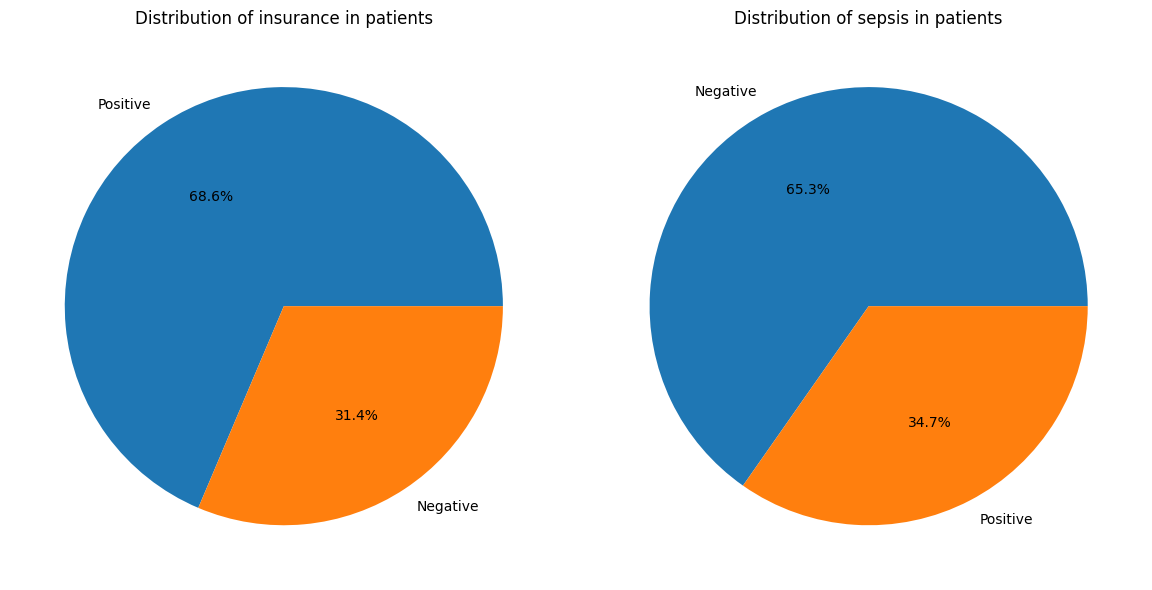

In [549]:
#checking distribution of categorical patients
fig, axs = plt.subplots(nrows=1, ncols=len(categoricals), figsize=(12,6))

for i, item in enumerate(categoricals):
    labels = data[item].value_counts().index
    axs[i].pie(data[item].value_counts(), autopct="%2.1f%%", labels = labels)
    axs[i].set_title(f'Distribution of {item} in patients')
    plt.tight_layout()

plt.show()

* There is an imbalance in the patient with sepsis and without. But it seems like there could be an inverse relationship between insurance and sepsis.

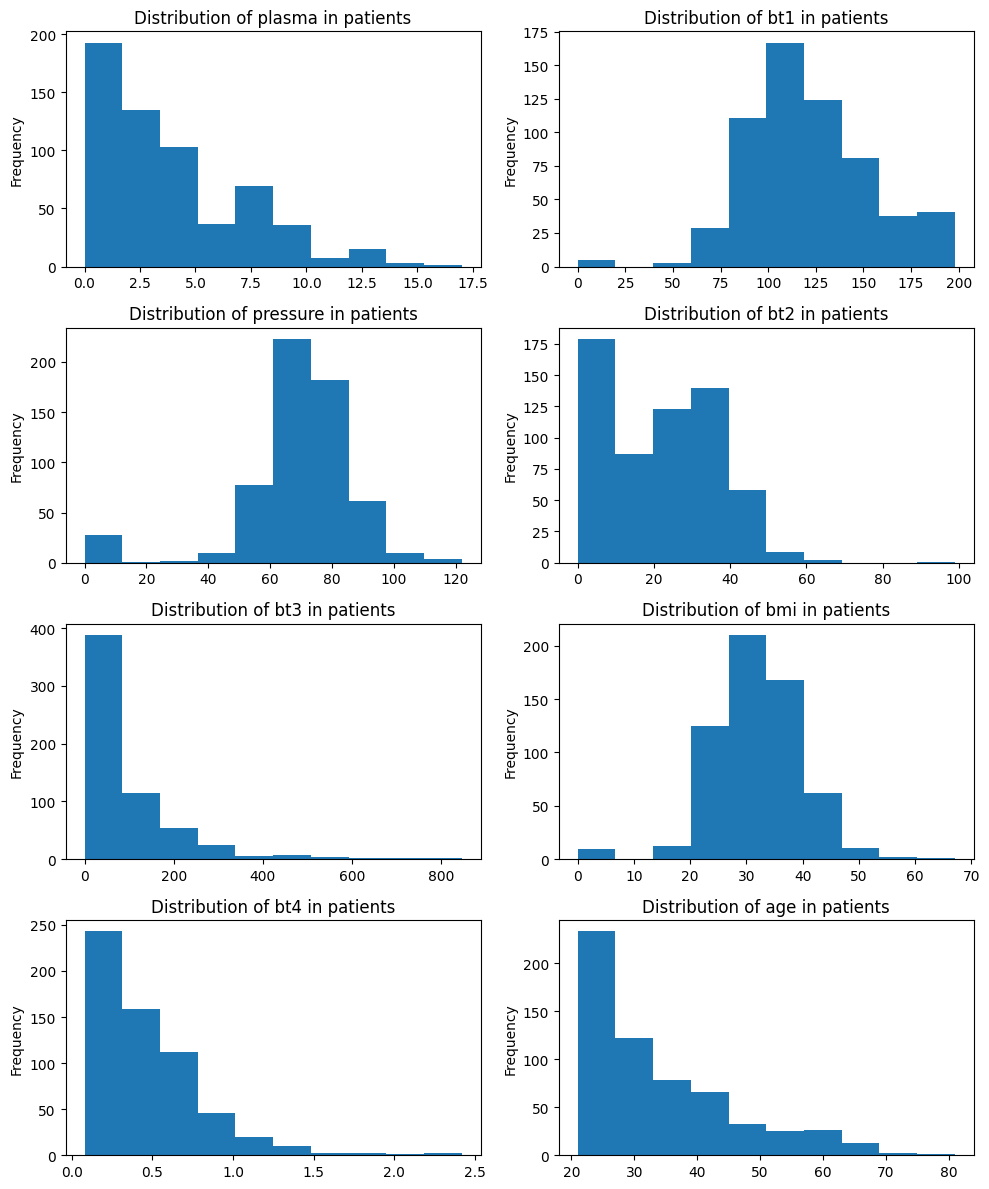

In [550]:
#checking distribution for all the numerical columns
fig, axs = plt.subplots(nrows=round(len(numericals)/2), ncols=2, figsize=(10,12))

for i, item in enumerate(numericals):
    row = i // 2
    col = i % 2
    data[item].plot(kind='hist', ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {item} in patients')
    plt.tight_layout()

plt.show()

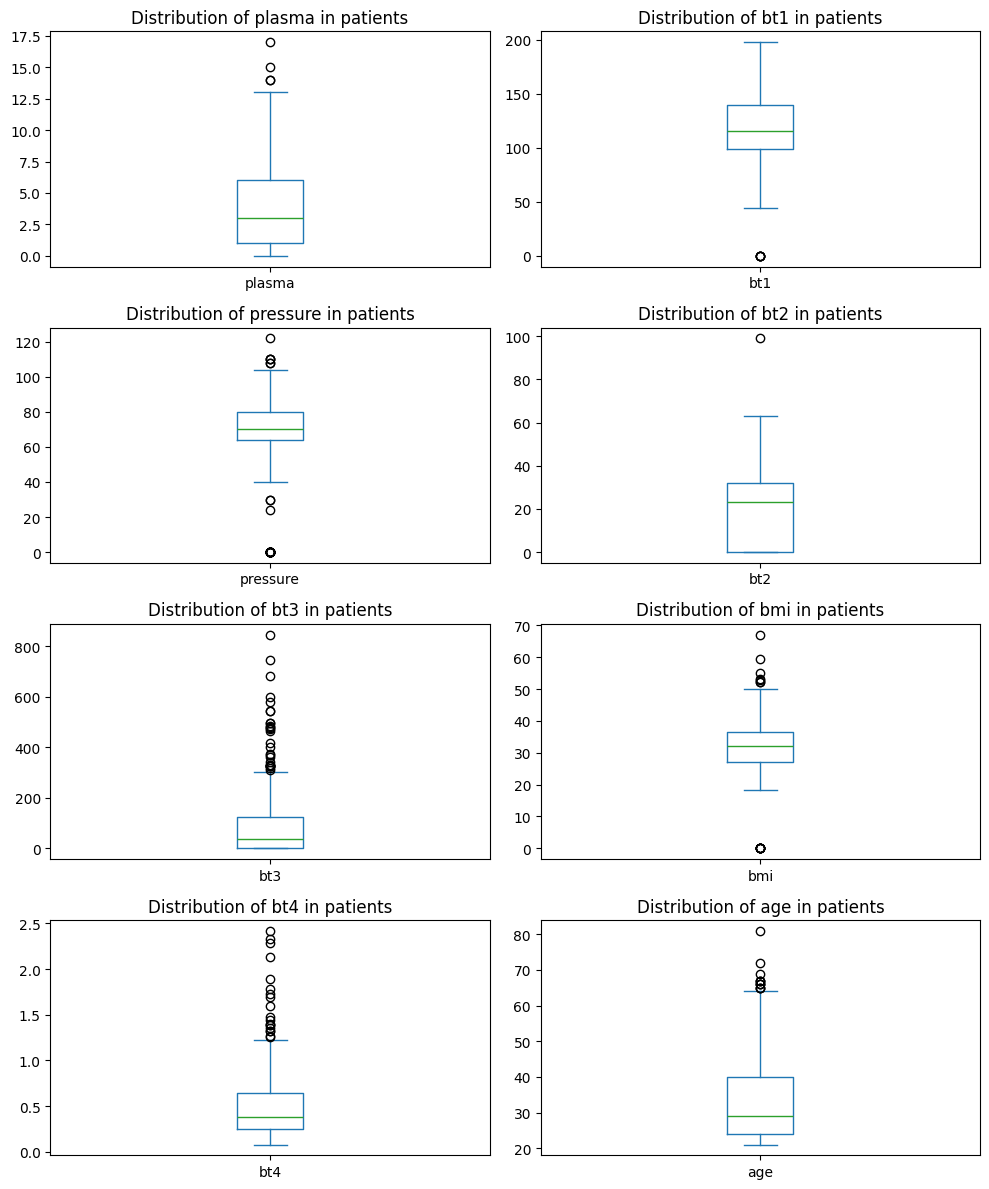

In [551]:
#checking outliers for all the numerical columns
fig, axs = plt.subplots(nrows=round(len(numericals)/2), ncols=2, figsize=(10,12))

for i, item in enumerate(numericals):
    row = i // 2
    col = i % 2
    data[item].plot(kind='box', ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {item} in patients')
    plt.tight_layout()

plt.show()

* The features are not nomrally distributed and they have a number of outliers. 
* We need to standardize and deal with the outliers.

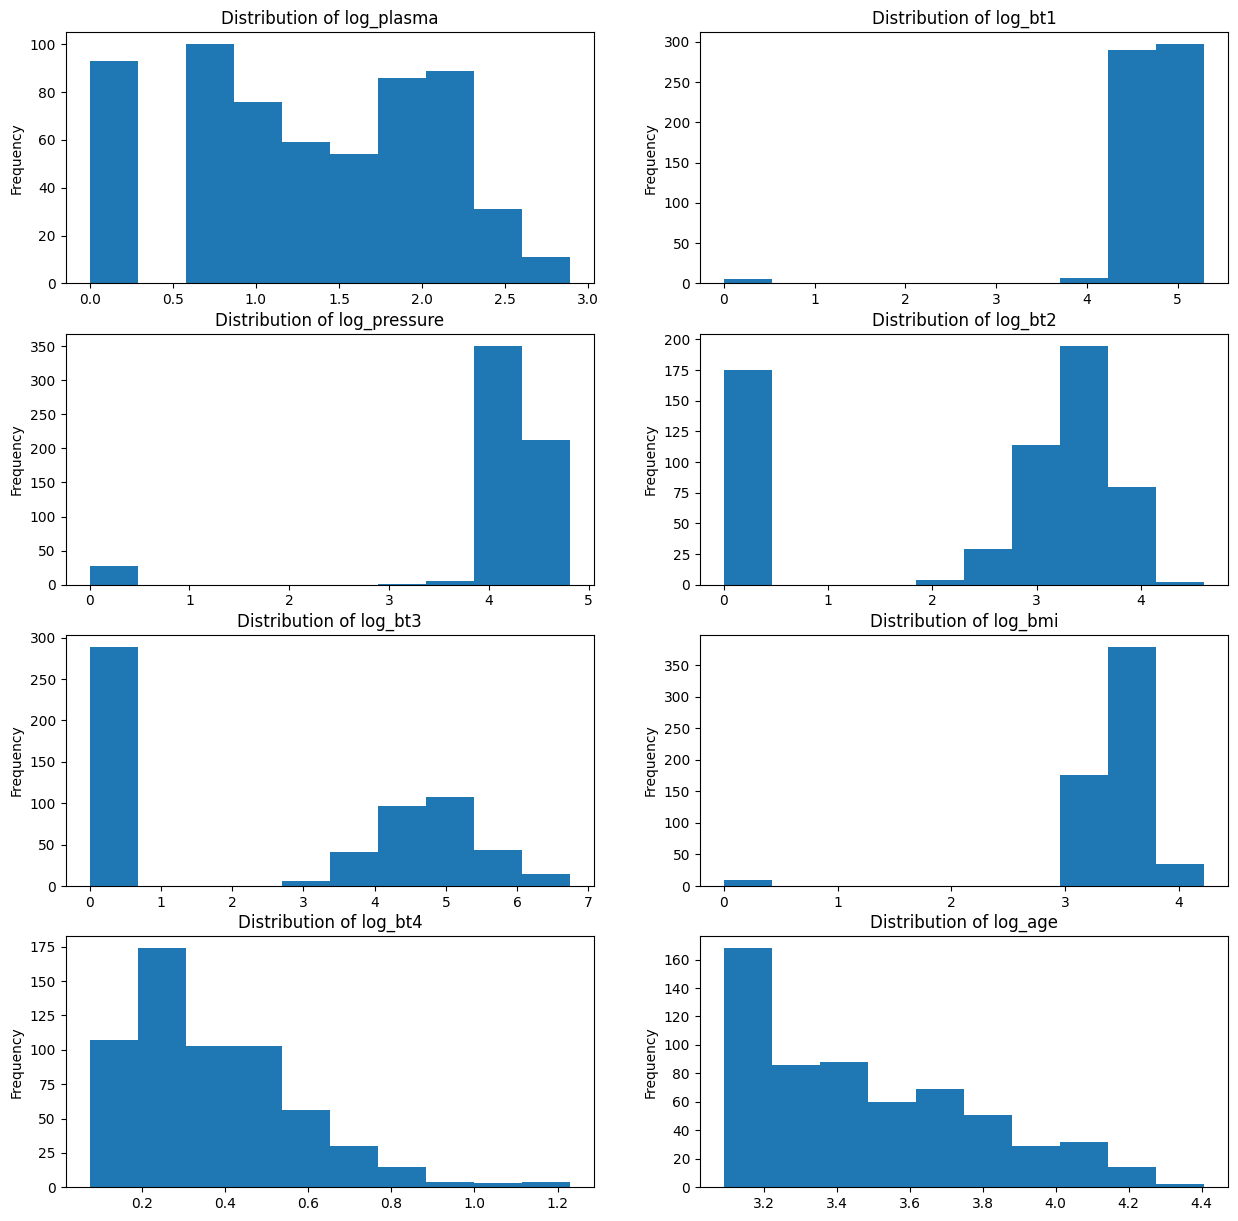

In [598]:
#checking log transformed distribution
log_data = pd.DataFrame()

fig, axs = plt.subplots(nrows=round(len(numericals)/2), ncols=2, figsize=(15,15))

for i, item in enumerate(data[numericals]):
    row = i // 2
    col = i % 2
    new_col = 'log_' + item
    log_data[new_col] = np.log1p(data[item])
    log_data[new_col].plot(kind='hist', ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {new_col}')

plt.show()

### **Bivariate Analysis**

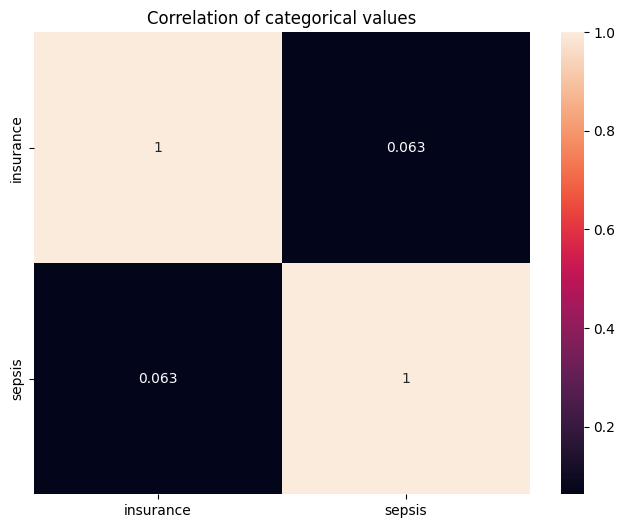

In [553]:
#correlation of categorical features
data_encoded = pd.DataFrame(columns=['insurance','sepsis'])
data_encoded['insurance'] = data['insurance'].map({'Positive':1,'Negative':0})
data_encoded['sepsis'] = data['sepsis'].map({'Positive':1,'Negative':0})

#plot correlation
plt.figure(figsize=(8,6))
sns.heatmap(data_encoded.corr('pearson', min_periods=1), annot=True)
plt.title('Correlation of categorical values')
plt.show()

* There is little to no significant correlation between insurance and sepsis.

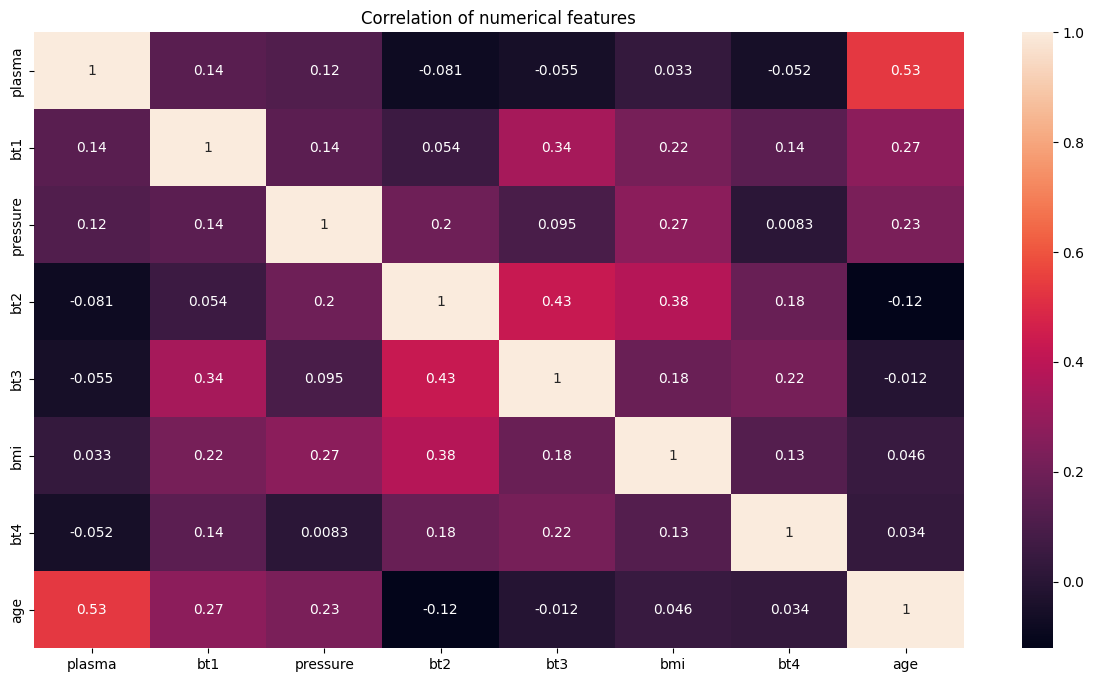

In [554]:
#correlation of numerical features
plt.figure(figsize=(15,8))
sns.heatmap(data[numericals].corr(), annot=True)
plt.title('Correlation of numerical features')
plt.show()

* There is correlation between `age` and `plasma` level,  and sk and between 

In [555]:

#replace the insurance and sepsis with the encoded versions
num_data = pd.concat([data_encoded,(data.drop(columns=['insurance','sepsis']))], axis=1)
num_data

,insurance,sepsis,plasma,bt1,pressure,bt2,bt3,bmi,bt4,age
0,0,1,6,148,72,35,0,33.6,0.627,50
1,0,0,1,85,66,29,0,26.6,0.351,31
2,1,1,8,183,64,0,0,23.3,0.672,32
3,1,0,1,89,66,23,94,28.1,0.167,21
4,1,1,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...,...
594,0,0,6,123,72,45,230,33.6,0.733,34
595,1,1,0,188,82,14,185,32.0,0.682,22
596,1,0,0,67,76,0,0,45.3,0.194,46
597,0,0,1,89,24,19,25,27.8,0.559,21


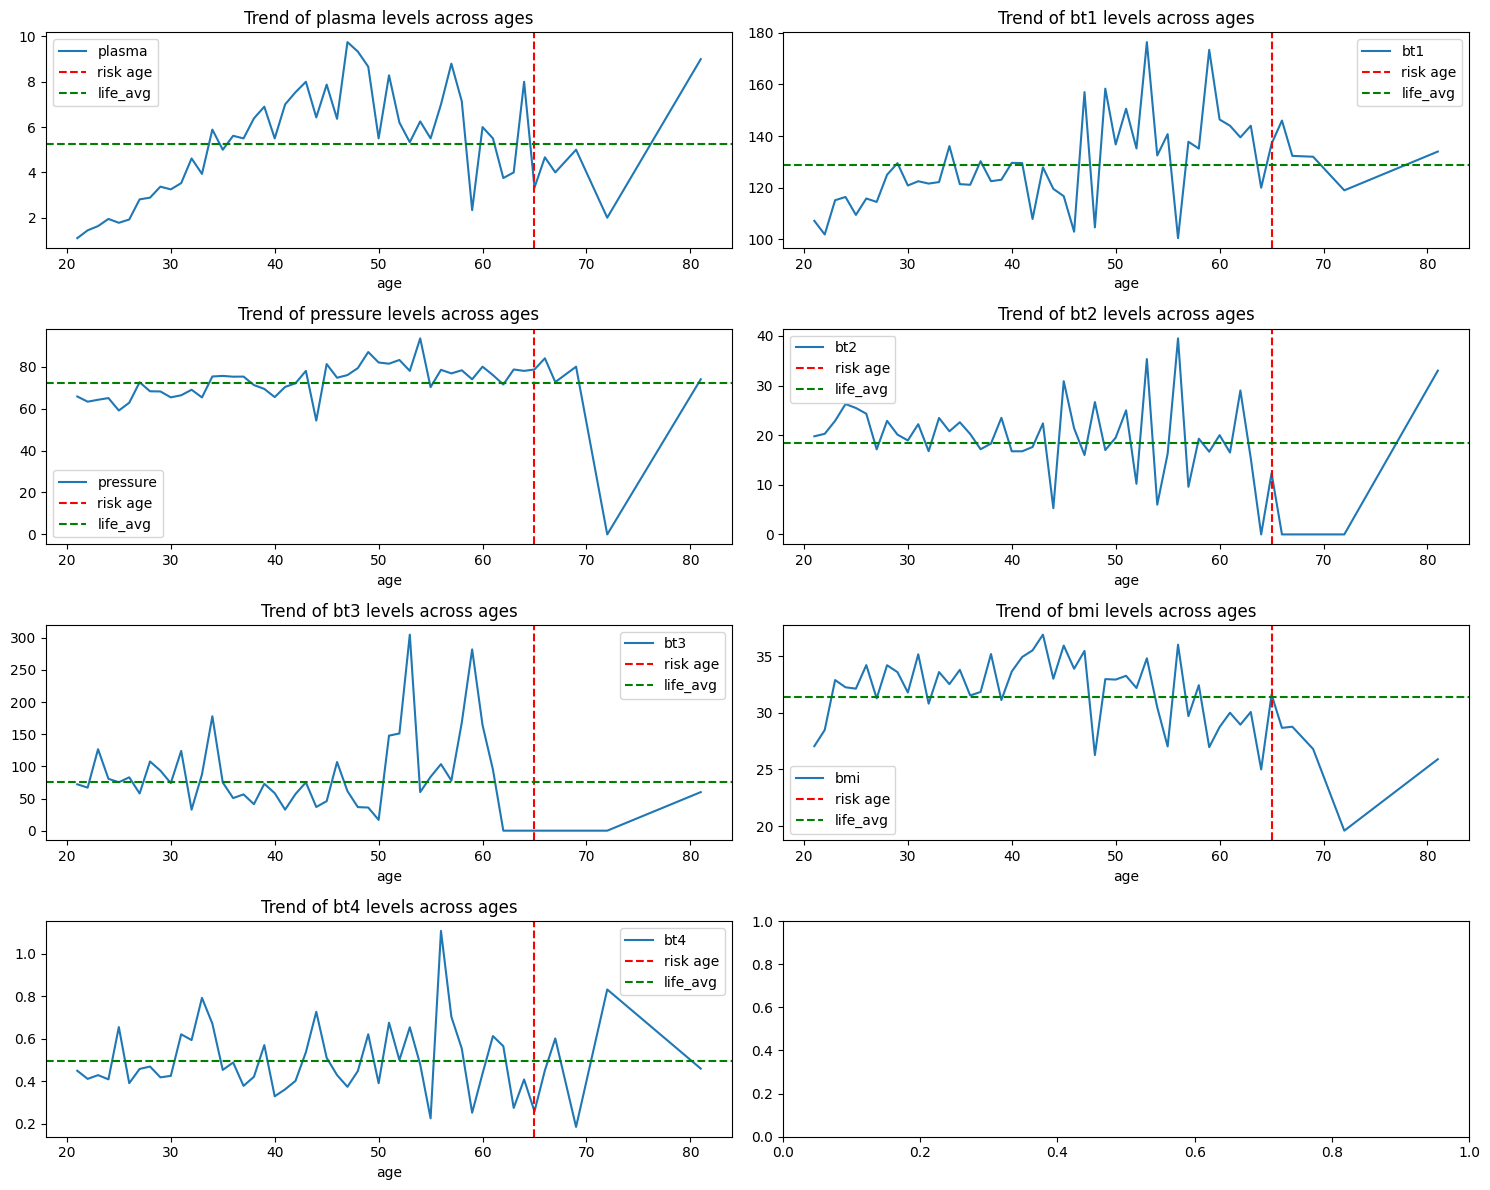

In [556]:
#check the trend of individual medical tests (numerical features) features across age groups
df = num_data[numericals].groupby('age').mean()

#create subplots
fig, axs = plt.subplots(nrows=round(len(df.columns)/2), ncols=2, figsize=(15,12))


for i, item in enumerate(df.columns):
    row = i // 2
    col = i % 2
    if item == ['insurance','sepsis']: #avoiding the categorical columns
        pass
    else:
        df[item].plot(kind='line', x=df.index, ax=axs[row, col], )
        axs[row, col].set_title(f'Trend of {item} levels across ages')
        axs[row, col].axvline(x=65, color='r', linestyle='--', label='risk age')
        axs[row, col].axhline(y=df[item].mean(), color='green', linestyle='--', label='life_avg')
        axs[row, col].annotate('risk_age', xy=(5, 0.5), xytext=(5, 0.55), arrowprops=dict(facecolor='black', shrink=0.05))
        axs[row, col].annotate('life_avg', xy=(5, 0.5), xytext=(5, 0.55), arrowprops=dict(facecolor='black', shrink=0.05))
        axs[row, col].legend()        

plt.tight_layout()
plt.show()

* There is a significant change in the patter for each blood test after the high risk age of 65 years.

## **Multivariate Analysis**

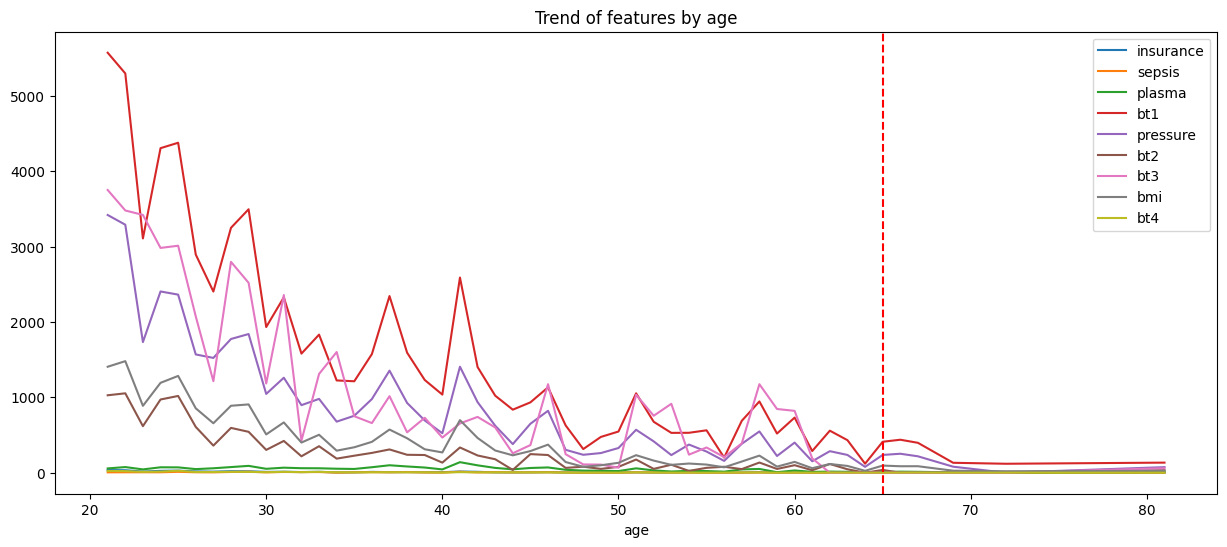

The data before the cut off age is very volatile for some features as compared to after the high risk age.



In [557]:
#checking trend of various tests by age taking into account the high risk age.
num_data.groupby('age').sum().plot(kind='line', figsize=(15,6))
plt.axvline(x=65, color='r', linestyle='--') #add high risk age cutoff line
plt.title('Trend of features by age')
plt.show()
print(f'The data before the cut off age is very volatile for some features as compared to after the high risk age.\n')

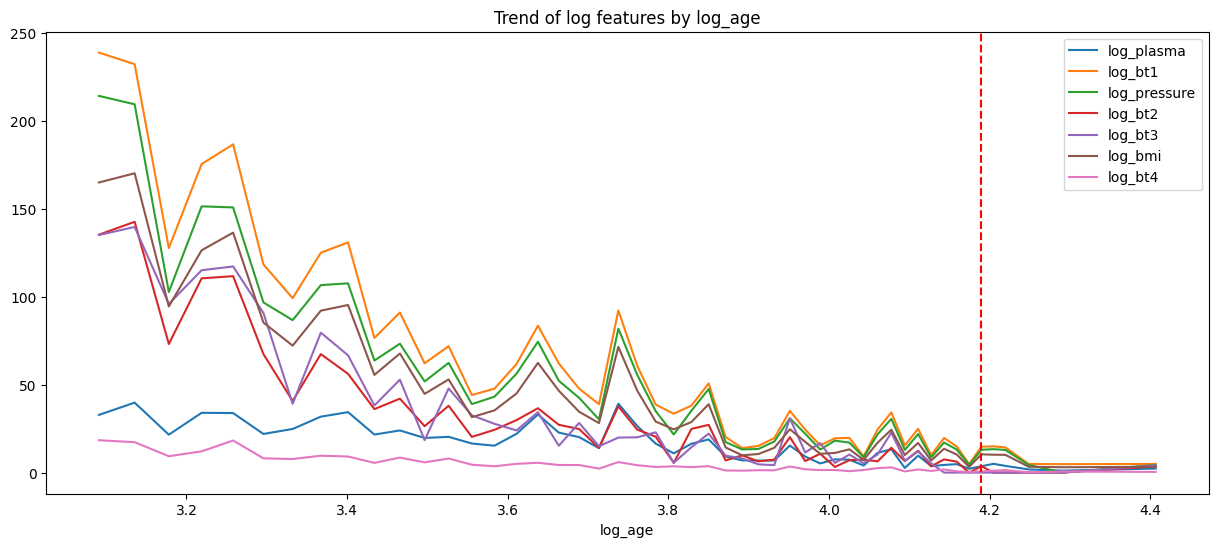

In [602]:
#checking trend of various tests by age taking into account the high risk age using log data.
log_data.groupby('log_age').sum().plot(kind='line', figsize=(15,6))
plt.axvline(x=np.log1p(65), color='r', linestyle='--') #add high risk age cutoff line
plt.title('Trend of log features by log_age')
plt.show()

#### **Key Medical Impact Summary**

Overall, this plot indicates that younger ages exhibit higher variability and values in certain blood test features, which stabilize as age increases. Understanding these trends can be critical in medical assessments and interventions targeted at age groups.

***Statistical Indicators**
1. *Trend Peaks and Decreases:*
The features `log_bt1`, `log_bt2`, and `log_pressure` show significant peaks in younger ages, specifically around the `log_age` of `3.1` to `3.2`, suggesting higher variability or values in early life. This quickly declines as age increases.
`log_bt3`, `log_bt4`, and `log_bmi` exhibit lower variability and smaller peaks compared to the other features but still follow a similar decreasing trend as age progresses.

2. *General Decrease with Age:*
All the log-transformed blood test features demonstrate a general decreasing trend with age. This might imply that these blood test values tend to stabilize or decrease as individuals grow older.

3. *Stabilization in Older Ages:*
From a `log_age` of about `3.8` and above, the values of all features tend to stabilize, showing fewer fluctuations. This could indicate that in older ages, the values of these blood tests remain relatively constant.

4. *Comparative Analysis:*
`log_plasma` and `log_bmi` maintain relatively lower values throughout the age spectrum compared to other features.
Features like `log_bt1` and `log_pressure` not only peak higher but also demonstrate higher fluctuations across the age spectrum, suggesting these may be more sensitive to changes with age.

Overall, this plot indicates that younger ages exhibit higher variability and values in certain blood test features, which stabilize as age increases. Understanding these trends can be critical in medical assessments and targeted interventions.

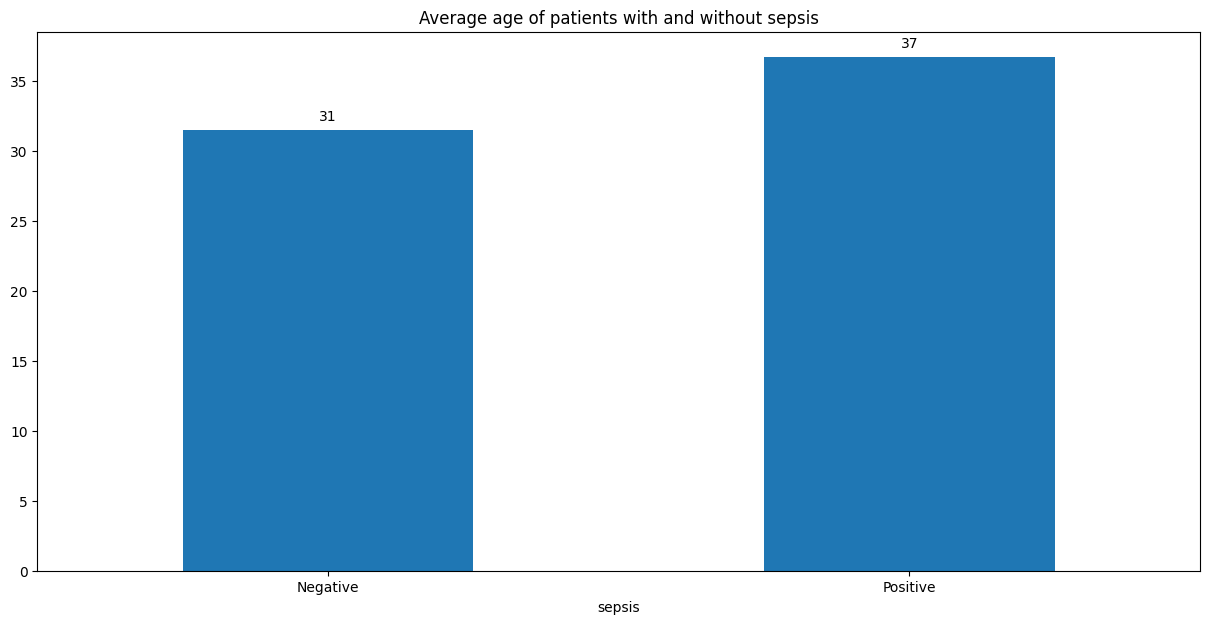

In [625]:
#checking sepsis age 
num_data.groupby('sepsis').age.mean().plot(kind='bar', figsize=(15,7))
plt.title('Average age of patients with and without sepsis')
# Annotate the bars with the mean age values
for p in plt.gca().patches:
    plt.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Set custom x-axis labels
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)

plt.show()

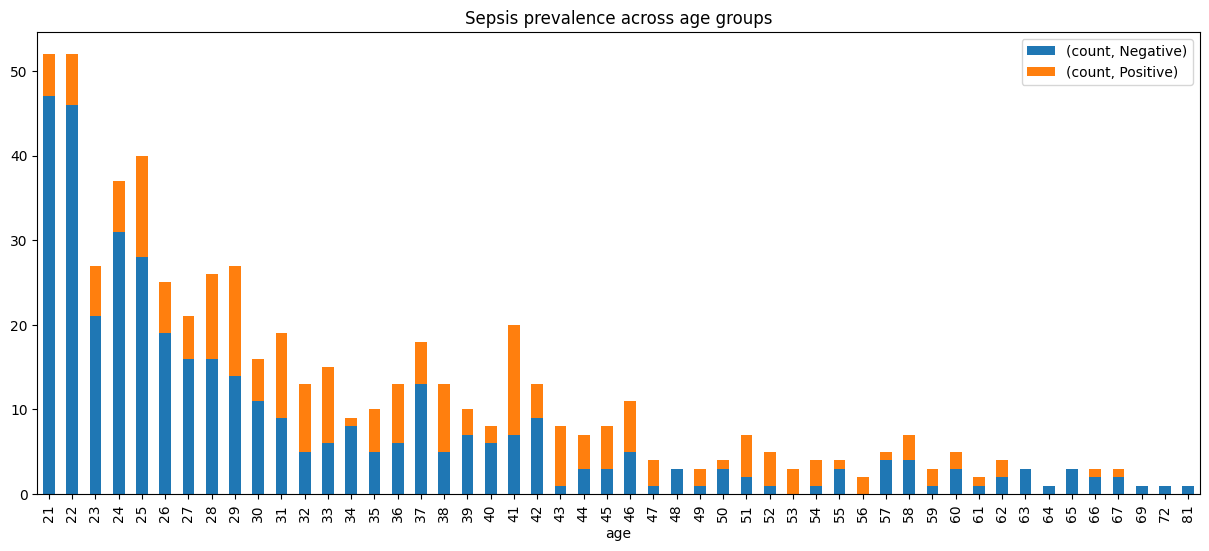

In [620]:
#Checking sepsis across different age groups
sepsis_by_age = (pd.DataFrame(data[['age', 'sepsis']]
                              .groupby('age')
                              .value_counts())
                 .unstack('sepsis'))

# Plot the stacked bar chart
sepsis_by_age.plot(kind='bar', stacked=True, figsize=(15,6))

plt.legend()
plt.title('Sepsis prevalence across age groups')
plt.show()

In [574]:
log_num_data = pd.DataFrame()

for col in num_data[numericals]:
    new_col = 'log_' + col
    log_num_data[new_col] = np.log1p(num_data[col])

log_num_data

,log_plasma,log_bt1,log_pressure,log_bt2,log_bt3,log_bmi,log_bt4,log_age
0,1.945910,5.003946,4.290459,3.583519,0.000000,3.543854,0.486738,3.931826
1,0.693147,4.454347,4.204693,3.401197,0.000000,3.317816,0.300845,3.465736
2,2.197225,5.214936,4.174387,0.000000,0.000000,3.190476,0.514021,3.496508
3,0.693147,4.499810,4.204693,3.178054,4.553877,3.370738,0.154436,3.091042
4,0.000000,4.927254,3.713572,3.583519,5.129899,3.786460,1.190279,3.526361
...,...,...,...,...,...,...,...,...
594,1.945910,4.820282,4.290459,3.828641,5.442418,3.543854,0.549854,3.555348
595,0.000000,5.241747,4.418841,2.708050,5.225747,3.496508,0.519984,3.135494
596,0.000000,4.219508,4.343805,0.000000,0.000000,3.835142,0.177309,3.850148
597,0.693147,4.499810,3.218876,2.995732,3.258097,3.360375,0.444045,3.091042


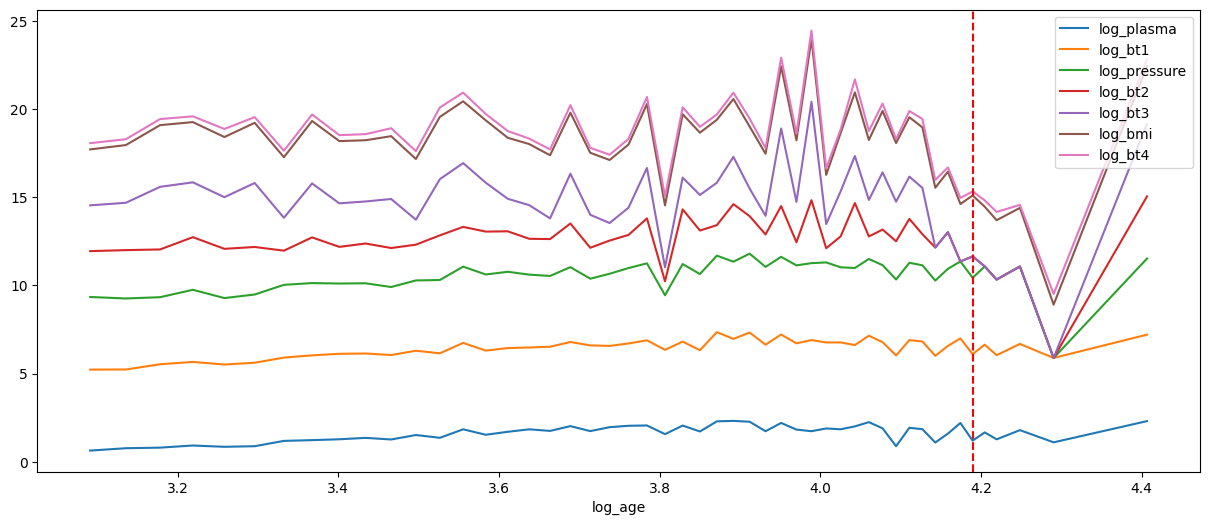

In [631]:
log_num_data.groupby('log_age').mean().plot(kind='line', stacked=True, figsize=(15,6))
plt.axvline(x=np.log1p(65), color='r', linestyle='--' )

### **Answering Analytical Questions**

## **Data Preparation**

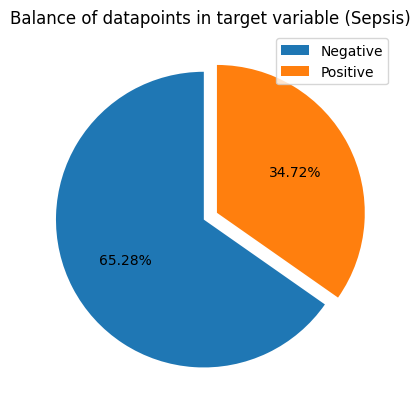

In [560]:
#check target variable balance
plt.pie(x=y.value_counts(), autopct='%2.2f%%', startangle=90, explode=[0.05,0.05])
plt.title('Balance of datapoints in target variable (Sepsis)')
plt.legend(labels=['Negative','Positive'])
plt.show()

In [561]:
#Splitting data
#Use Stratified Test Split
X = log_num_data.drop(columns= ['sepsis'])
y = log_num_data['sepsis']
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [562]:
# Encoding target variable
encoder = LabelEncoder()

#fitting y_train and y_eval
y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.transform(y_eval)

In [567]:
#categoric and numerical values
num_data['insurance'] = num_data['insurance'].astype('object')
num_data['sepsis'] = num_data['sepsis'].astype('object')

numerical = X.select_dtypes('number').columns
categoric = X.select_dtypes('object').columns

#build pipeline
# Set up the transformers
# For the numeric variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), # handlie missing values
                                      ("scaler", StandardScaler()) # scale numerics
                                     ]
                              )
# For the categorical variables
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(sparse_output=False)),
                                       ("imputer", SimpleImputer(strategy="most_frequent"))
                                      ]
                               )
# Set up the final preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[("numeric", numeric_transformer, numerical),
                                                     ("categorical", categorical_transformer, categoric)
                                                    ]
                                      )
preprocessor


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['insurance', 'plasma', 'bt1', 'pressure', 'bt2', 'bt3', 'bmi', 'bt4',
       'age'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(sparse_output=False)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index([], dtype='object'))])

## **Modelling**

In [563]:
#Building Model List
models = [('RandomForest', RandomForestClassifier(random_state=42)), 
          ('LogisticRegression',LogisticRegression(random_state=42)),
          ('AdaBoost',AdaBoostClassifier(random_state=42, n_estimators=67)),
          ('XGB', XGBClassifier(random_state = 42, verbose = False, n_jobs = -1)),
          ('DecisionTree', DecisionTreeClassifier(random_state= 42)),
          ('KNN',KNeighborsClassifier(n_neighbors=7))
          ]

In [568]:
#create a dictionary to host all the trained models
all_pipelines = {}

#Create a dataframe of the evaluation metrics
metrics_df = pd.DataFrame(columns=['model','precision','recall','f1_score'])

#Create a dataframe for confusion matrices
confusion_df = pd.DataFrame(columns=['model','matrix'])

#loop over models in model list
for model_name,classifier in models:
    #create final pipeline for training
    final_pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier)
    ])
    
    #fitting data to pipeline
    final_pipeline.fit(X_train,y_train)
    
    #adding to dictionary
    all_pipelines[model_name] = final_pipeline
    
    #perform prediction
    y_pred = final_pipeline.predict(X_eval)
    
    #calculate evaluation metrics
    metrics = classification_report(y_eval,y_pred, output_dict=True)
    
    #define the columns to add to the table
    model = model_name
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    #append evaluation metrics to dataframe
    metrics_df.loc[len(metrics_df)] = [model,precision,recall,f1_score]
    
    #plot the confusion matrix
    pipeline_conf_dict = {}
    
    # Define the Confusion Matrix
    model_conf_mat = confusion_matrix(y_eval, y_pred)
    
    #append confusion matrix to dictionary
    pipeline_conf_dict[model_name] = pd.DataFrame(model_conf_mat)
    
    #append to confusion dataframe
    confusion_df.loc[len(confusion_df)] = [model_name,pd.DataFrame(model_conf_mat)]
     
#set index   
confusion_df = confusion_df.set_index('model')

metrics_df.sort_values('f1_score', ascending=False)

,model,precision,recall,f1_score
2,AdaBoost,0.759725,0.758333,0.758975
1,LogisticRegression,0.740306,0.741667,0.740933
4,DecisionTree,0.716667,0.716667,0.716667
3,XGB,0.709982,0.708333,0.709108
0,RandomForest,0.700000,0.700000,0.700000
5,KNN,0.700000,0.700000,0.700000
